<a href="https://colab.research.google.com/github/Beekay-5/Data-storytelling-project/blob/main/STAGE_D_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**READING THE DATASETS FROM MY GOOGLE DRIVE**

In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/Africa Food Production (2004 - 2013).csv")
df2 = pd.read_csv("/content/drive/MyDrive/Africa Food Supply (2004 - 2013).csv")

**FOOD PRODUCTION DATASET**

In [6]:
print(df1)

        Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]


**GROUPING THE DATASET FOR SIMPLIFICATION**

In [ ]:
df1grouped = df1.groupby(["Country", "Year", "Item"]).first()
df1grouped

**FINDING THE SUM TOTAL OF THE VALUES OF EACH ITEM IN EACH YEAR AND COUNTRY**

In [34]:
df1total = df1grouped.pivot_table("Value", ["Country", "Year"], aggfunc="sum").reset_index()
df1total

,Country,Year,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
...,...,...,...
445,Zimbabwe,2009,5754
446,Zimbabwe,2010,6777
447,Zimbabwe,2011,7551
448,Zimbabwe,2012,8173


**SCATTER PLOT FOR FOOD PRODUCTION**

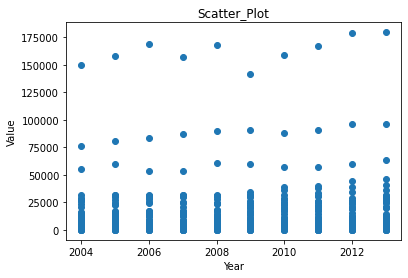

In [40]:
plt.scatter(df1total["Year"], df1total["Value"])
plt.title("Scatter_Plot")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

**A MORE EXPLAINABLE SCATTER PLOT ON THE FOOD PROUCTION**:
This plot has presented us with a picture that implies that countries like "Mali, Mauritania, Mauritius, Morocco, Mozambiquw, Namibia especially, Niger and Nigeria" have been the ones with relatively high food proction between 2004 and 2013

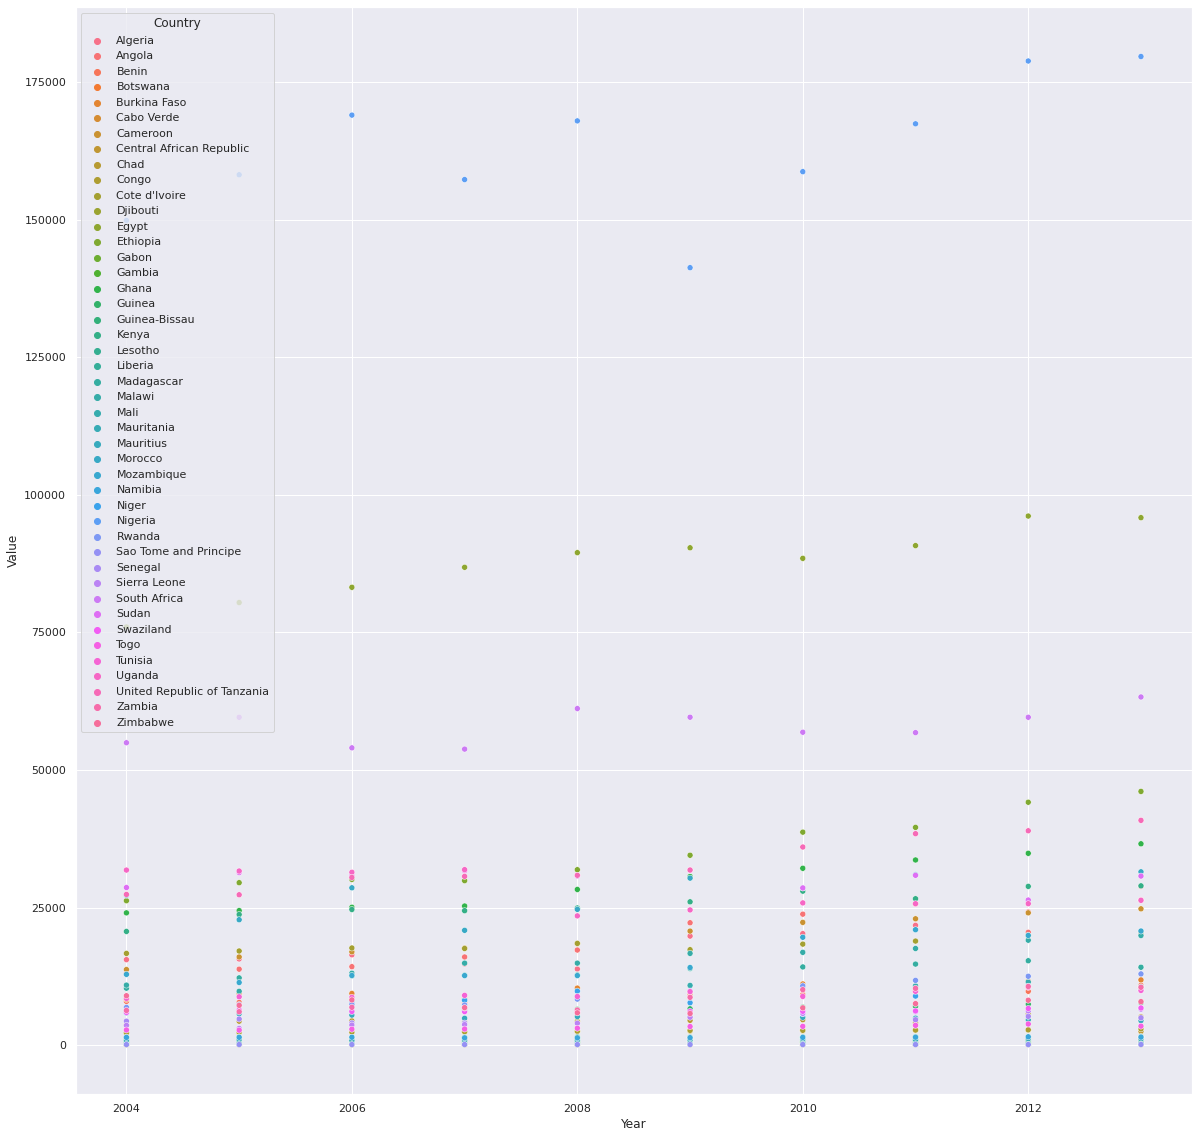

In [57]:
sns.scatterplot(x = "Year", y = "Value", data = df1total, hue = "Country")
sns.set(rc = {"figure.figsize":(10,10)})
plt.show()

**FOOD SUPPLY DATASET**

In [58]:
print(df2)

      Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]


**GROUPING THE FOOD SUPPPLY BY COUNTRY**

In [ ]:
df2.groupby(df2["Country"]).first()
df2

**SCATTER PLOT ON FOOD SUPPLY**:
The plot below has shown us how each country has been trying trying her best to rise in food supply while countries like "Egypt and Ethiopia" have had a consistent rise in food supply or consumption between 2004 and 2013, that is they have more food for consumption than other countries

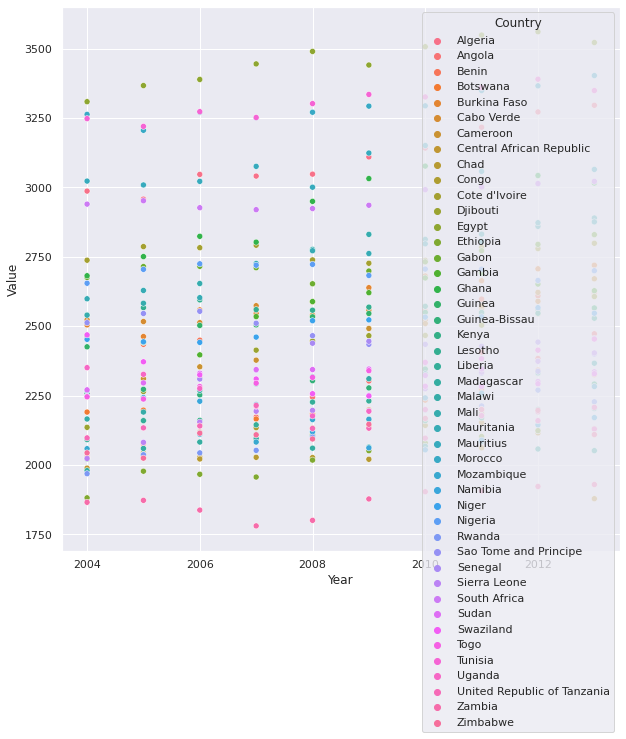

In [61]:
sns.scatterplot(x = "Year", y = "Value", data = df2, hue = "Country")
sns.set(rc = {"figure.figsize":(10,10)})
plt.show()

**FOOD PRODUCTION LINE CHART** :
This graph below implies that just a few number of countries have produce valuable large quantities of food items between 2004 and 2013

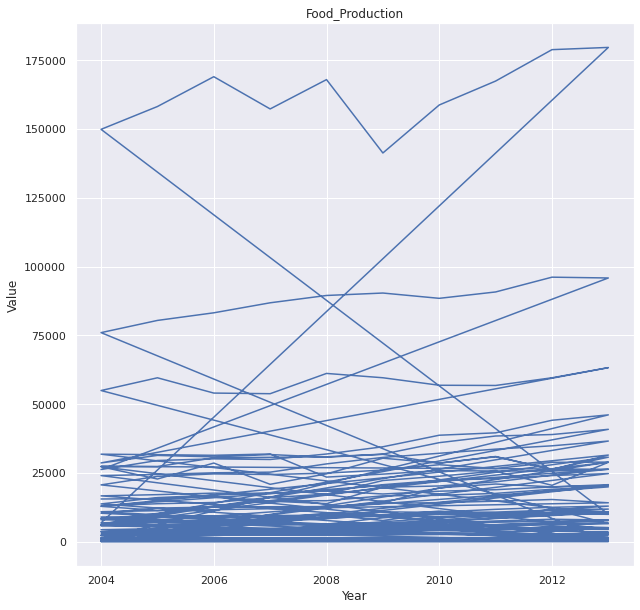

In [69]:
plt.plot(df1total["Year"], df1total["Value"])
plt.title("Food_Production")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

**FOOD SUPPLY LINE CHART**:
The graph below implies that a rough number of countries in the world have been intermitent in their food supply between 2004 and 2013 while very very few of them have consistently increased their rate of consumption

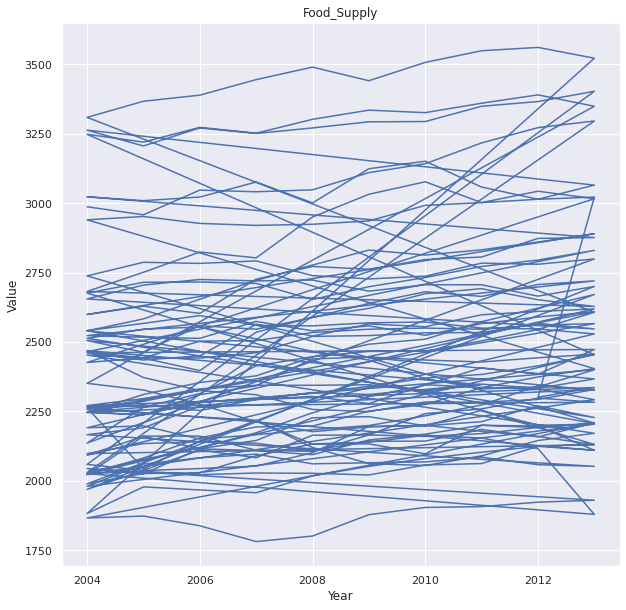

In [67]:
plt.plot(df2["Year"], df2["Value"])
plt.title("Food_Supply")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

**BOXPLOT ON FOOD PRODUCTION**

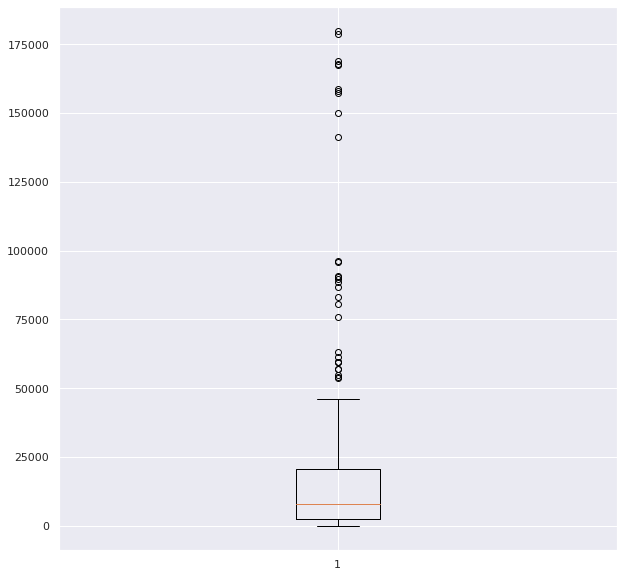

In [86]:
plt.figure(figsize = (10,10))
plt.boxplot(df1total["Value"])
plt.show()

**BOXPLOT ON FOOD SUPPLY/CONSUMPTION**

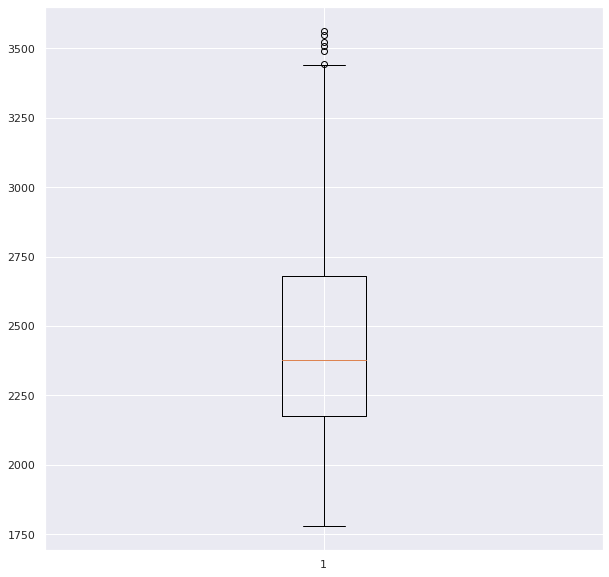

In [87]:
plt.figure(figsize = (10,10))
plt.boxplot(df2["Value"])
plt.show()

**HYPOTHESIS TESTING**:                                             
Independent Variable = FOOD SUPPLY/CONSUMPTION                        
Dependent Variable = FOOD PRODUCTION

NULL HYPOTHESIS: MEAN(FOODSUPPLY)=MEAN(FOODPRODUCTION)                           
ALT. HYPOTHESIS: MEAN(FOODSUPPLY)!=MEAN(FOODPRODUCTION)

MEAN1 = 16833.591111

In [80]:
mean1 = df1total["Value"].mean()
mean1

16833.591111111113

MEAN2 = 2469.775556

In [79]:
mean2 = df2["Value"].mean()
mean2

2469.7755555555555

**TEST STATISTIC AND ITS PROBABILITY(P-VALUE)**

In [84]:
t_value, p_value = stats.ttest_ind(df1total["Value"], df2["Value"])
print(t_value)
print(p_value)

10.996084289079299
1.785862956975237e-26


**DECISION RULE**

In [85]:
alpha = 0.05
if p_value<=alpha:
  print("Reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

Reject the null hypothesis


**CONCLUSION**                                                               
The hypothesis test done above implies that we can safely conclude that there is a significant correlation between the food production and food consumption becuase the p-value is significantly far from zero.                        
This means that there is every possibility that the population consume more when there is a high quantity produced. There is also the possibility that the quantity of food items produced in a year affects the rate of food consumption that year.

POSSIBLE SOLUTION TO FOOD SHORTAGE                                           
In my opinion, if food items are not excessively produced, then the rate of consumption and wasted would be reduced as well. We tend to waste resources when we have them in excess so a possible solution is that food production should probably depend solely on increase in population so as to prevent excess consumtion, food wastage and even food scarcity